# <b><font color = 'red'>Linear regression model application on house prices
### <a><b><font color = 'blue'>ABDELILAH DAHAMOU

## Import Libraries

In [105]:
import pandas as pd
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_formats = ['svg']

## Fitting a linear regression model with Gradient Descent.

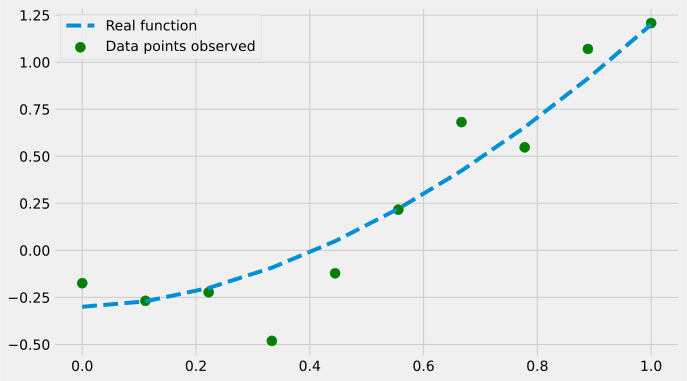

In [106]:
#@title We generate datapoints from a polynomial function.
n_points = 10
noise_magnitude = 0.2

x = np.linspace(0.0, 1.0, n_points)
x.sort()

y_real = 1.5 * x ** 1.8 - 0.3

# We add some artificial noise, as it is quite common to train on noisy data.
y = y_real + noise_magnitude * np.random.normal(size=n_points)

plt.plot(x, y_real, '--', label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points observed')
_ = plt.legend(loc='best')

In [107]:
#@title Defining our linear model, its cost function, and a way to display its predictions.
def linear_regression(x, w, b):
  return x * w + b

def mean_squared_error(y, y_pred):
  return ((y - y_pred)**2).mean() / 2.0

def plot_linear_regression(x, y, y_pred):
  plt.ylim((-2.0, 2.0))
  error = y - y_pred
  mse = mean_squared_error(y, y_pred).round(2)
  plt.fill_between(x, y, y_pred, color='r', alpha=0.25, label=f'Error (MSE = {mse})')
  plt.bar(x, error, width=0.005, bottom=y_pred, color='red', alpha=0.25)
  plt.scatter(x, y, s=100, c='g', label='Data points')
  plt.plot(x, y_pred, '--', label='Linear regression')
  _ = plt.legend(loc='best')

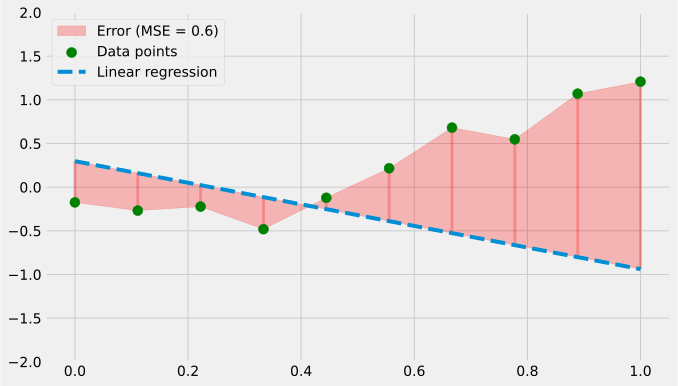

In [108]:
#@title Initializing weights randomly.
w_0 = np.random.normal()
b_0 = np.random.normal()

# Display the initial model.
y_pred = linear_regression(x, w_0, b_0)
plot_linear_regression(x, y, y_pred)

In [109]:
def gradient_descent(x, y, w_0, b_0, learning_rate, iterations=10):
  weights = [(w_0, b_0)]
  errors = []
  for i in range(iterations):
    w, b = weights[-1]
    # We calculate the model's prediction / error with the latest weights.
    y_pred = linear_regression(x, w, b)
    error = mean_squared_error(y, y_pred)
    # We update the weights based on the error at this step.
    w = w - learning_rate * np.dot(x, y_pred - y) / len(x)
    b = b - learning_rate * (y_pred - y).mean()
    # We store the weights/error for later use.
    weights.append((w, b))
    errors.append(error)
  w, b = weights[-1]
  errors.append(mean_squared_error(y, linear_regression(x, w, b)))
  return weights, errors

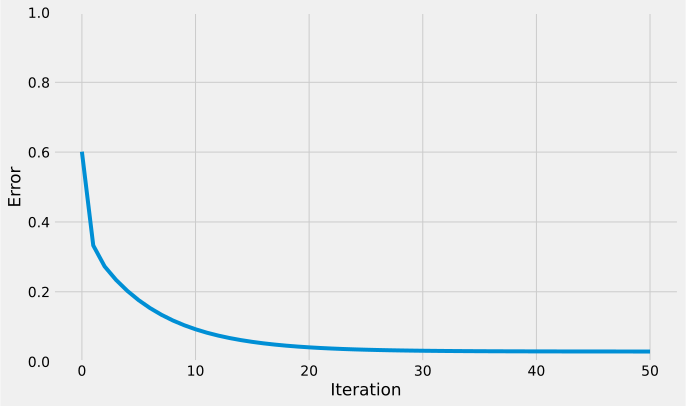

In [110]:
#@title Visualize the evolution of the error throughout the gradient descent process.
iterations = 50
weights, errors = gradient_descent(x, y, w_0, b_0, learning_rate=1.0, iterations=iterations)
plt.plot(range(iterations + 1), errors)
plt.xlabel("Iteration")
plt.ylabel("Error")
_ = plt.ylim((0, 1.0))

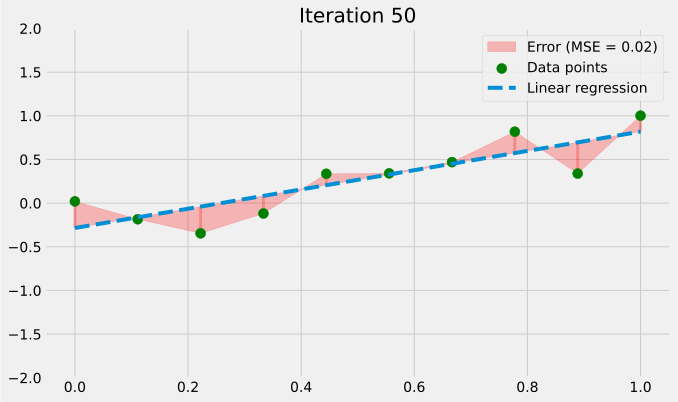

In [88]:
#@title Visualize the weights at different iterations.
from IPython.display import clear_output
import time

for n_iter, ((w, b), error) in enumerate(zip(weights, errors)):
  clear_output(wait=True)
  y_pred = linear_regression(x, w, b)
  plot_linear_regression(x, y, y_pred)
  plt.title(f"Iteration {n_iter}")
  plt.show()
  time.sleep(1.0 if n_iter < 10 else 0.0)

In [89]:
pip install wget

## Linear Regression on real-world data.

In [92]:
df = pd.read_csv('train.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
92,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
117,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000
539,540,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000
428,429,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,195400
394,395,50,RL,60.0,10134,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,109000


<AxesSubplot:ylabel='Frequency'>

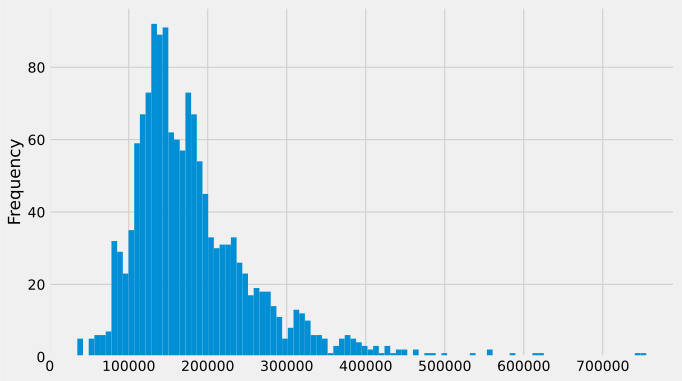

In [93]:
df.SalePrice.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

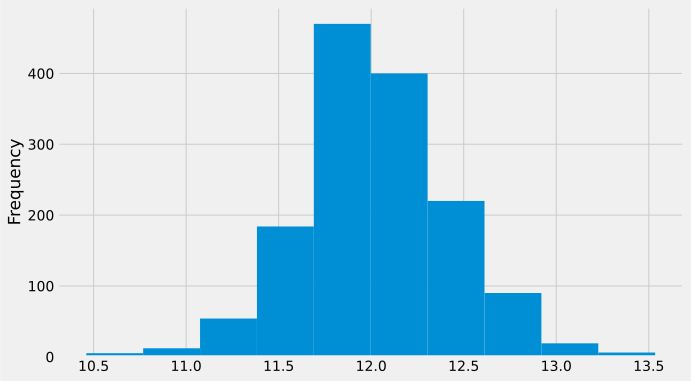

In [94]:
target = np.log(df['SalePrice'])
target.plot.hist()

In [95]:
numeric_features = df[['OverallQual', 'GrLivArea']]
numeric_features.sample(5)

,OverallQual,GrLivArea
1459,5,1256
130,7,2157
297,7,1950
221,6,2267
759,8,2531


In [96]:
categorical_features = df[['MSZoning', 'Neighborhood']]
categorical_features.head()

,MSZoning,Neighborhood
0,RL,CollgCr
1,RL,Veenker
2,RL,CollgCr
3,RL,Crawfor
4,RL,NoRidge


In [97]:
features = pd.concat([numeric_features, pd.get_dummies(categorical_features)], axis=1)
features = (features - features.mean()) / features.std()
features.sample(32)

,OverallQual,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1155,-0.794879,-0.149318,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,11.473319
680,-0.071812,-1.127471,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,4.871293,-0.250096,-0.131946,-0.163415,-0.087099
720,1.374324,0.431103,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,7.573684,-0.163415,-0.087099
161,2.097391,2.193300,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,4.236595,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
554,0.651256,1.009622,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,4.236595,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
657,0.651256,-0.025622,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
480,2.097391,0.636629,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,4.236595,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
1387,-0.071812,1.923071,-0.083017,-0.215785,-0.105227,-1.929344,2.386073,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,3.451404,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
1332,-1.517947,-1.331094,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
1067,-0.071812,0.181808,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [99]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

baseline = DummyRegressor()
baseline.fit(x_train, y_train)
mean_squared_error(y_test, baseline.predict(x_test))

0.14877147033553434

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
mean_squared_error(y_test, model.predict(x_test))

0.03054902671372187

In [101]:
len(features.columns)


32

In [102]:
len(model.coef_)



32

In [103]:
model.coef_


array([ 1.54244054e-01,  1.51815742e-01, -7.58072240e+10, -1.89570334e+11,
       -9.56907989e+10, -3.75442553e+11, -3.27578686e+11, -2.32361345e+10,
       -8.01124502e+09, -2.25501712e+10, -4.23052493e+10, -2.97068621e+10,
       -6.57638957e+10, -3.97691986e+10, -5.47111331e+10, -4.90023197e+10,
       -3.40415689e+10, -2.32361345e+10, -3.90092681e+10, -7.82043648e+10,
       -1.69535720e+10, -4.72069471e+10, -3.57840408e+10, -4.84130794e+10,
       -5.78801002e+10, -2.80997341e+10, -4.75120457e+10, -4.26531714e+10,
       -5.09974953e+10, -2.80997341e+10, -3.44863992e+10, -1.87299574e+10])

Text(0.5, 0, 'Variable coefficient')

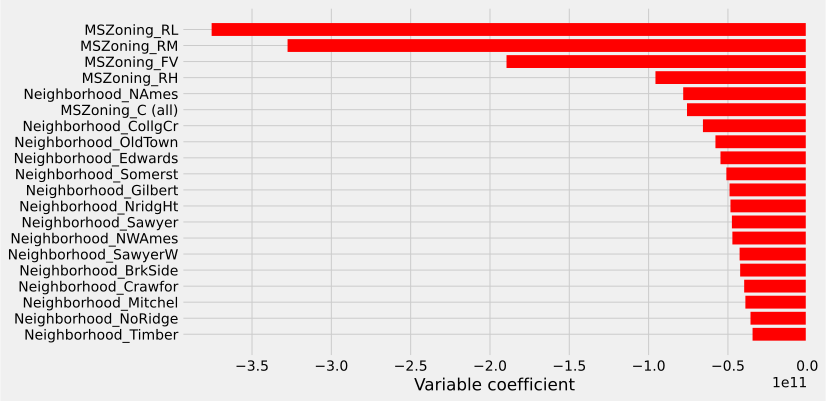

In [104]:
top_n = 20
top_feature_indices = np.abs(model.coef_).argsort()[-top_n:]
top_coefficients = model.coef_[top_feature_indices]
plt.barh(range(top_n), top_coefficients, color=['r' if v < 0 else 'g' for v in top_coefficients])
_ = plt.yticks(range(top_n), features.columns[top_feature_indices])
plt.xlabel("Variable coefficient")

# <b><font color = 'purple'>FIN